Project Description:
A study into how Deep learning using Neural Networks can be used to predict the success of PGA Tour professional golfers based on a variety of their yearly playing statistics.

Code has either been used directly from the following places or adapted/learnt from to support my coding needs.
The following are the references for all snippets of code that supported the creation of my end products.
Code References:

(Prater, 2018)
Prater, D. (2018) ‘daronprater/PGA-Tour-Data-Science-Project’. Available at: https://github.com/daronprater/PGA-Tour-Data-Science-Project/blob/85a58ca806bf2ba2deb74b7f96471f5fcb36a551/PGA%20Tour%20Machine%20Learning%20Project%20-%20Classification.ipynb (Accessed: 10th March 2023).


(Jong, 2019)
Jong (2019) PGA Tour Machine Learning Project (2019). Available at: https://kaggle.com/code/jmpark746/pga-tour-machine-learning-project (Accessed: 18th March 2023).


(Stewart PhD, 2023)
Mathew Stewart PhD, M.S. (2023) Simple Guide to Hyperparameter Tuning in Neural Networks, Medium. Available at: https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594 (Accessed: 10th April 2023).


(Basic regression | TensorFlow Core, 2023)
Basic regression: Predict fuel efficiency | TensorFlow Core (2023) TensorFlow. Available at: https://www.tensorflow.org/tutorials/keras/regression (Accessed: 29th March 2023).


(Harvpan, 2018)
Harvpan (2018) ‘Answer to “Change the regression line of Seaborn’s pairplot”’, Stack Overflow. Available at: https://stackoverflow.com/a/50724511 (Accessed: 20th March 2023).


(Moffitt, 2017)
Moffitt, C. (2017) Guide to Encoding Categorical Values in Python - Practical Business Python. Available at: https://pbpython.com/categorical-encoding.html (Accessed: 15th April 2023).



Data Acquisition:
All data used for the project has been collected through and credited to the official PGA Tour statistics web page. Available at: ('https://www.pgatour.com/stats')
I utilised the data scraping code designed by (Prater, 2018) as well as downloaded csv files directly from the offical website to collect a comprehensive data set spanning from 2012 to 2018.

These dates were chosen for my data as they would be unaffected by the lack of golfing data produced due to the Covid-19 pandemic.
The 2012 data is also recent enough to not be skewed by the natural statistical increases of player performance stats caused by improved clubs/technologies.

I collected a wide variety of golfer performance statistics that would help to develop a competent model for predicting the number of top 10 placements a professional player would achieve in a given year.
Some of these statistics/columns were utilised by (Jong, 2019) and (Prater, 2018) to assist in derriving their models and inspired some of my decision making.

I will go into much further detail regarding the chosen statistics and how they affect player performance in my research paper.

In [29]:
#The following code shows the various python libraries and packages utilised when conducting my data analysis and neural network model development.
#Numpy and Pandas will be used to drop my data into data frames and numpy arrays for cleansing, filtering and general pre-modelling analysis.
#I will be using seaborn and matplotlib for graphical representations of my data and models.
#As we can see below, my Machine Learning models would make use of TensorFlow, SKLearn and Keras. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

#This import will be important for the future optimization of my models using a grid search method for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#The following code is to reatin continuity in my models as reloading models and re-doing calculations can yield varying results.
#Setting seeds for TensorFlow and Numpy will prevent these changes.
tf.random.set_seed(50)
np.random.seed(50)
tf.keras.utils.set_random_seed(50)


In [30]:
#loading data from my CSV file collected into dataframe.
#Its worth mentioning that the CSV address is likely to change when the final package is submitted for marking. You may need to change this for when you run the code alongside the data.
df = pd.read_csv('FinalProjectPGATourData.csv')

# Examining the first 5 rows of data to see if all my columns are being pulled correctly from the csv.
print(df.head())

      Player Name  Year  Rounds Played in Year  Average Fairway Percentage  \
0  Henrik Stenson  2018                     60                       75.19   
1     Ryan Armour  2018                    109                       73.58   
2     Chez Reavie  2018                     93                       72.24   
3      Ryan Moore  2018                     78                       71.94   
4    Brian Stuard  2018                    103                       71.44   

   Average Driving Distance  Average GIR  Average Putts  Average Scrambling  \
0                     291.5        73.51          29.93               60.67   
1                     283.5        68.22          29.31               60.13   
2                     286.5        68.67          29.12               62.27   
3                     289.2        68.80          29.17               64.16   
4                     278.9        67.12          29.11               59.23   

   Average Score  Average SG Putts  Average SG Total  SG

In [31]:
#Looking at general data from the top and bottom of the csv, making sure the data loaded fine.
df.info

<bound method DataFrame.info of          Player Name  Year  Rounds Played in Year  Average Fairway Percentage  \
0     Henrik Stenson  2018                     60                       75.19   
1        Ryan Armour  2018                    109                       73.58   
2        Chez Reavie  2018                     93                       72.24   
3         Ryan Moore  2018                     78                       71.94   
4       Brian Stuard  2018                    103                       71.44   
...              ...   ...                    ...                         ...   
1673  Phil Mickelson  2010                     76                       52.66   
1674       John Daly  2010                     63                       52.21   
1675    Jimmy Walker  2010                     82                       51.29   
1676   Daniel Chopra  2010                     74                       51.27   
1677   Martin Flores  2010                     75                       50.15

In [32]:
#Checking size of data from csv file, 1678 unique rows of player data from 2012 to 2018.
#15 columns of data that will be used as features for the AI model.
df.shape

(1678, 15)

In [33]:
# Changing all empty values to 0's
# Changing some incorrect variable typings to keep consistency
df['Top 10 Placements'].fillna(0, inplace=True)
df['Top 10 Placements'] = df['Top 10 Placements'].astype(int)
df.dropna(axis = 0, inplace=True)
df['Rounds Played in Year'] = df['Rounds Played in Year'].astype(int)

#wanted to test some code to convert player names to numbers as Tensors can only accept variables of the number class.
#I dont think this was used as I ended up dropping player names and player code as they were not useful features for my models.
ord_enc = OrdinalEncoder()
df["player_code"] = ord_enc.fit_transform(df[["Player Name"]])
df = df.drop(columns=['Player Name'])
#player conversion code loosely based on the worked presented by (Moffitt, 2017).

In [34]:
#Checking if changes to my feature types are correct and whether any other changes need to be made.
#For the sake if consistency it may be worth converting Year and Rounds player in Year to Float64's.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1678 non-null   int64  
 1   Rounds Played in Year       1678 non-null   int32  
 2   Average Fairway Percentage  1678 non-null   float64
 3   Average Driving Distance    1678 non-null   float64
 4   Average GIR                 1678 non-null   float64
 5   Average Putts               1678 non-null   float64
 6   Average Scrambling          1678 non-null   float64
 7   Average Score               1678 non-null   float64
 8   Average SG Putts            1678 non-null   float64
 9   Average SG Total            1678 non-null   float64
 10  SG:OTT                      1678 non-null   float64
 11  SG:APR                      1678 non-null   float64
 12  SG:ARG                      1678 non-null   float64
 13  Top 10 Placements           1678 

In [35]:
#I realised that player_code was useful before as a good lookup value for players, but would provide no utility for dat aanalysis or modelling.
df = df.drop(columns=['player_code'])

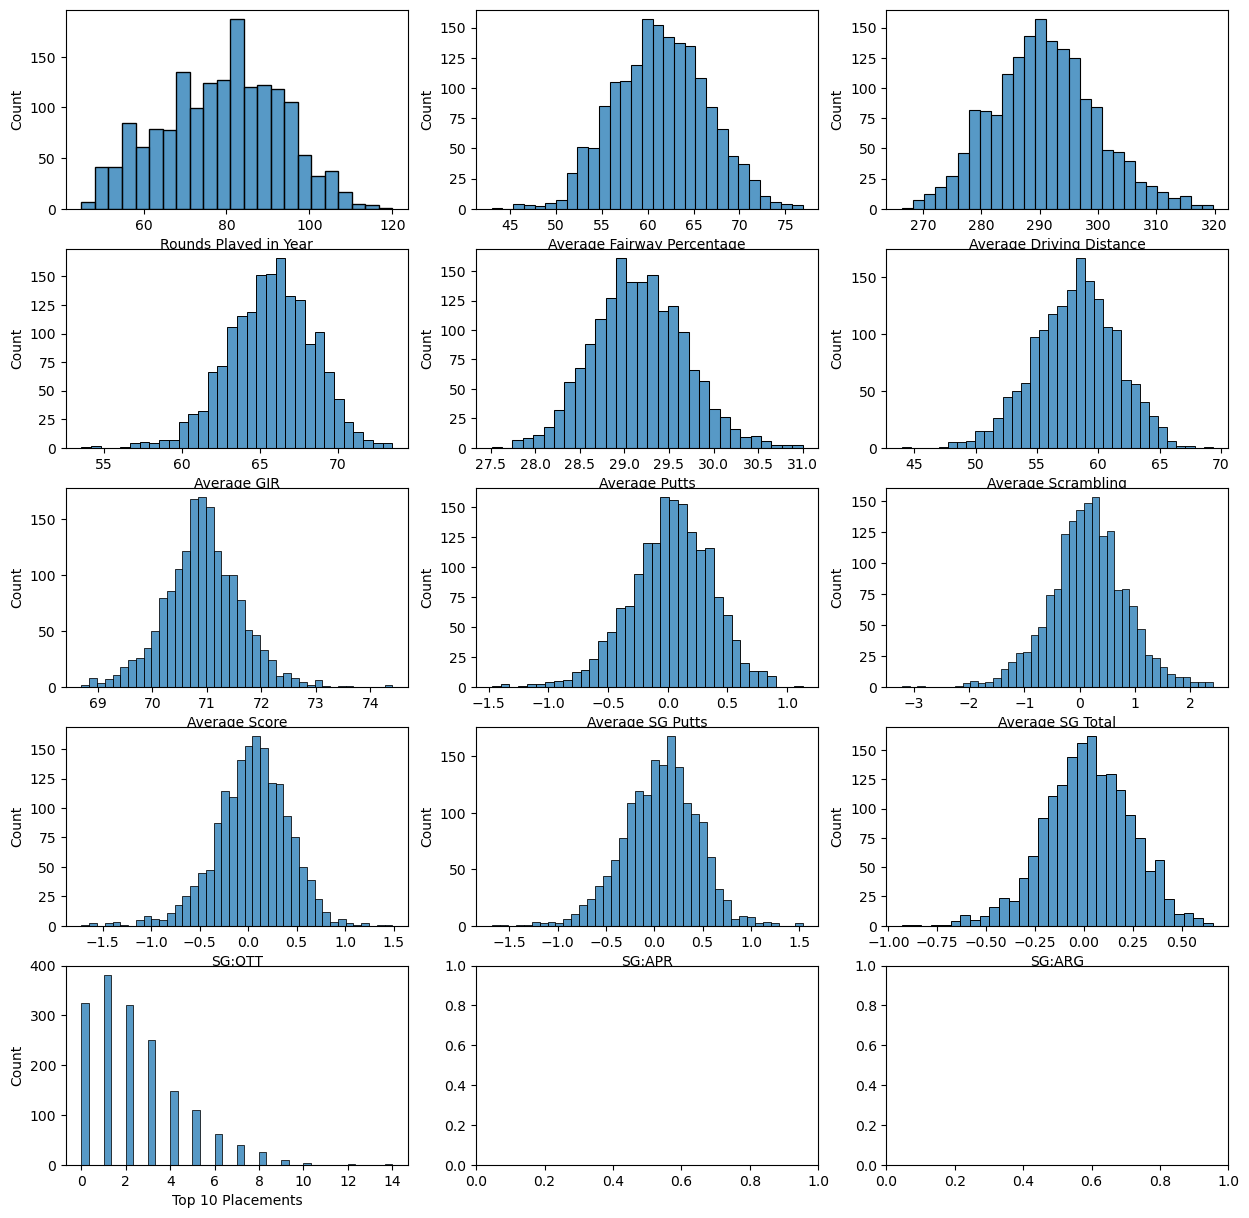

In [36]:
#I created this initial set of graphs to get a gague of the distribution of each of my features.
#Knowing the shape of my data and how well the features vary from player to player would help me to rationalise feature choices and the effectiveness they would have on determining player performance.
#This is also very helpful in seeing that my label choice of number of 'Top 10 Placements' is highly concentrated at the lower values of 0, 1 and 2.
#Fruther explanation and analysis will be discussed in my research paper.
function, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(15,15))
#No need for distribution of names or years
spread = df.loc[:,df.columns!='Player Name'].columns
spread = df.loc[:,df.columns!='Year'].columns
x = 0
y = 0
#Looping through the various columns of data and drawing historgrams to represent the distributions.
#3x5 grid design to cover all the features.
for i, column in enumerate(spread):
    p = sns.histplot(df[column], ax=ax[x][y])
    y += 1
    if y == 3:
        y = 0
        x += 1
#This type of graphing was inspired by the work of simmilar golf stats analysis found in (Prater, 2018).
#Snippets of his code assisted the development of these graphs.
#Code takes a few seconds to run.

In [37]:
#Creating a variable defining the players that had atleast one or more top 10 placement in a year.
#This will be good for building a comparison between the more successful Profesioal golfers and the less so as we can see how each stat varies between the two strands of player.
upperEchelonPlayers = df.loc[df['Top 10 Placements'] >= 1, :]
#Checking the dataframe for the players who have placed atleast once in the top 10 in a tournamnet in a year.
print(upperEchelonPlayers.head())

   Year  Rounds Played in Year  Average Fairway Percentage  \
0  2018                     60                       75.19   
1  2018                    109                       73.58   
2  2018                     93                       72.24   
3  2018                     78                       71.94   
4  2018                    103                       71.44   

   Average Driving Distance  Average GIR  Average Putts  Average Scrambling  \
0                     291.5        73.51          29.93               60.67   
1                     283.5        68.22          29.31               60.13   
2                     286.5        68.67          29.12               62.27   
3                     289.2        68.80          29.17               64.16   
4                     278.9        67.12          29.11               59.23   

   Average Score  Average SG Putts  Average SG Total  SG:OTT  SG:APR  SG:ARG  \
0         69.617            -0.207             1.153   0.427   0.960  -0

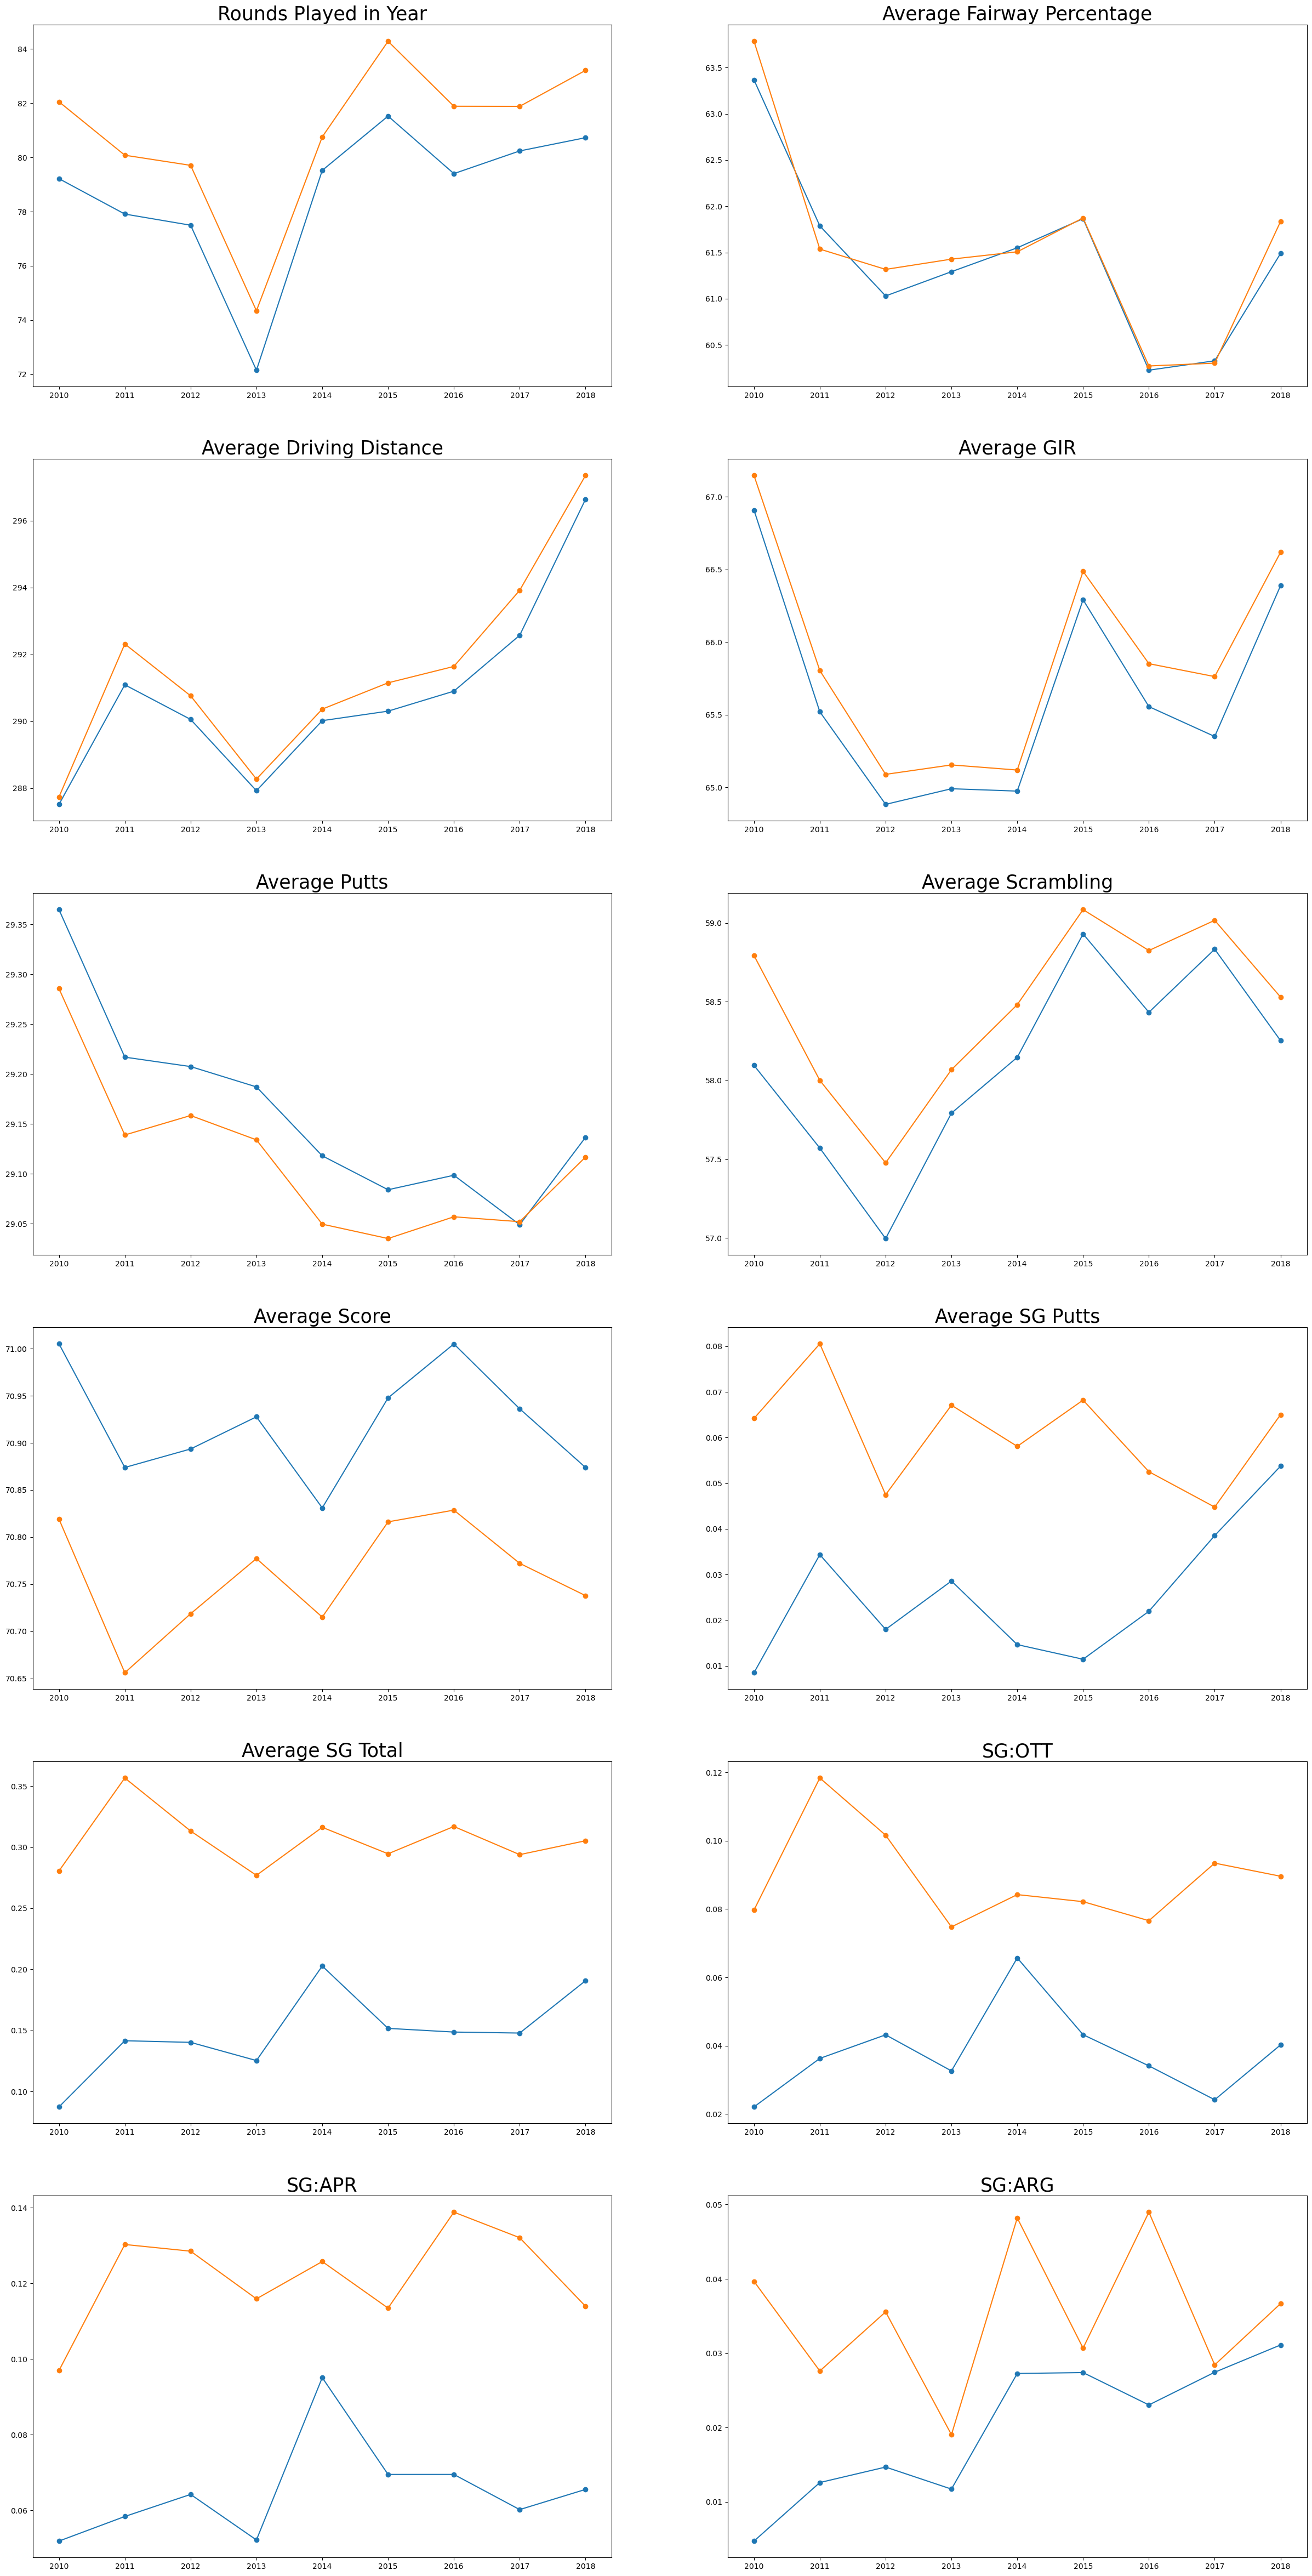

In [38]:
#Code written to display visually the difference in statistics between the player who have atleast place in the top 10 once and the rest of the field.
function, cord = plt.subplots(nrows = 6, ncols = 2, figsize=(30,60))
spread = df.loc[:,df.columns!='Player Name'].columns
spread = spread[spread != 'Year']
spread = spread[spread != 'Top 10 Placements']

x = 0
y = 0
#Certain stats in gold are better the lower they are, such as number of putts and average score.
lower_better = ['Average Putts', 'Average Score']
for i, column in enumerate(spread):
#data is being grouped by year to show the differences in stats on a year to year basis.
    avg = df.groupby('Year')[column].mean()
    best = upperEchelonPlayers.groupby('Year')[column].mean()
    cord[x,y].plot(avg, 'o-',)
    cord[x,y].plot(best, 'o-',)
    cord[x,y].set_title(column, fontsize = 25)
    
    y += 1
    if y == 2:
        y = 0
        x += 1
#As we can see from the graphs generated below, Players that have had atleast a single top 10 placemnet are overall achieving better statistics for every feature compared to the rest of the field.
#This is pretty consistent througt the years and supports my feature choices as they seem to be contributing factors to the number fo top 10 placements.
#Further explanations and analysis of graphs below will be done in my research paper.
#Comparative idea inspired by code produced in (Jong, 2019), snippets of his code used here.

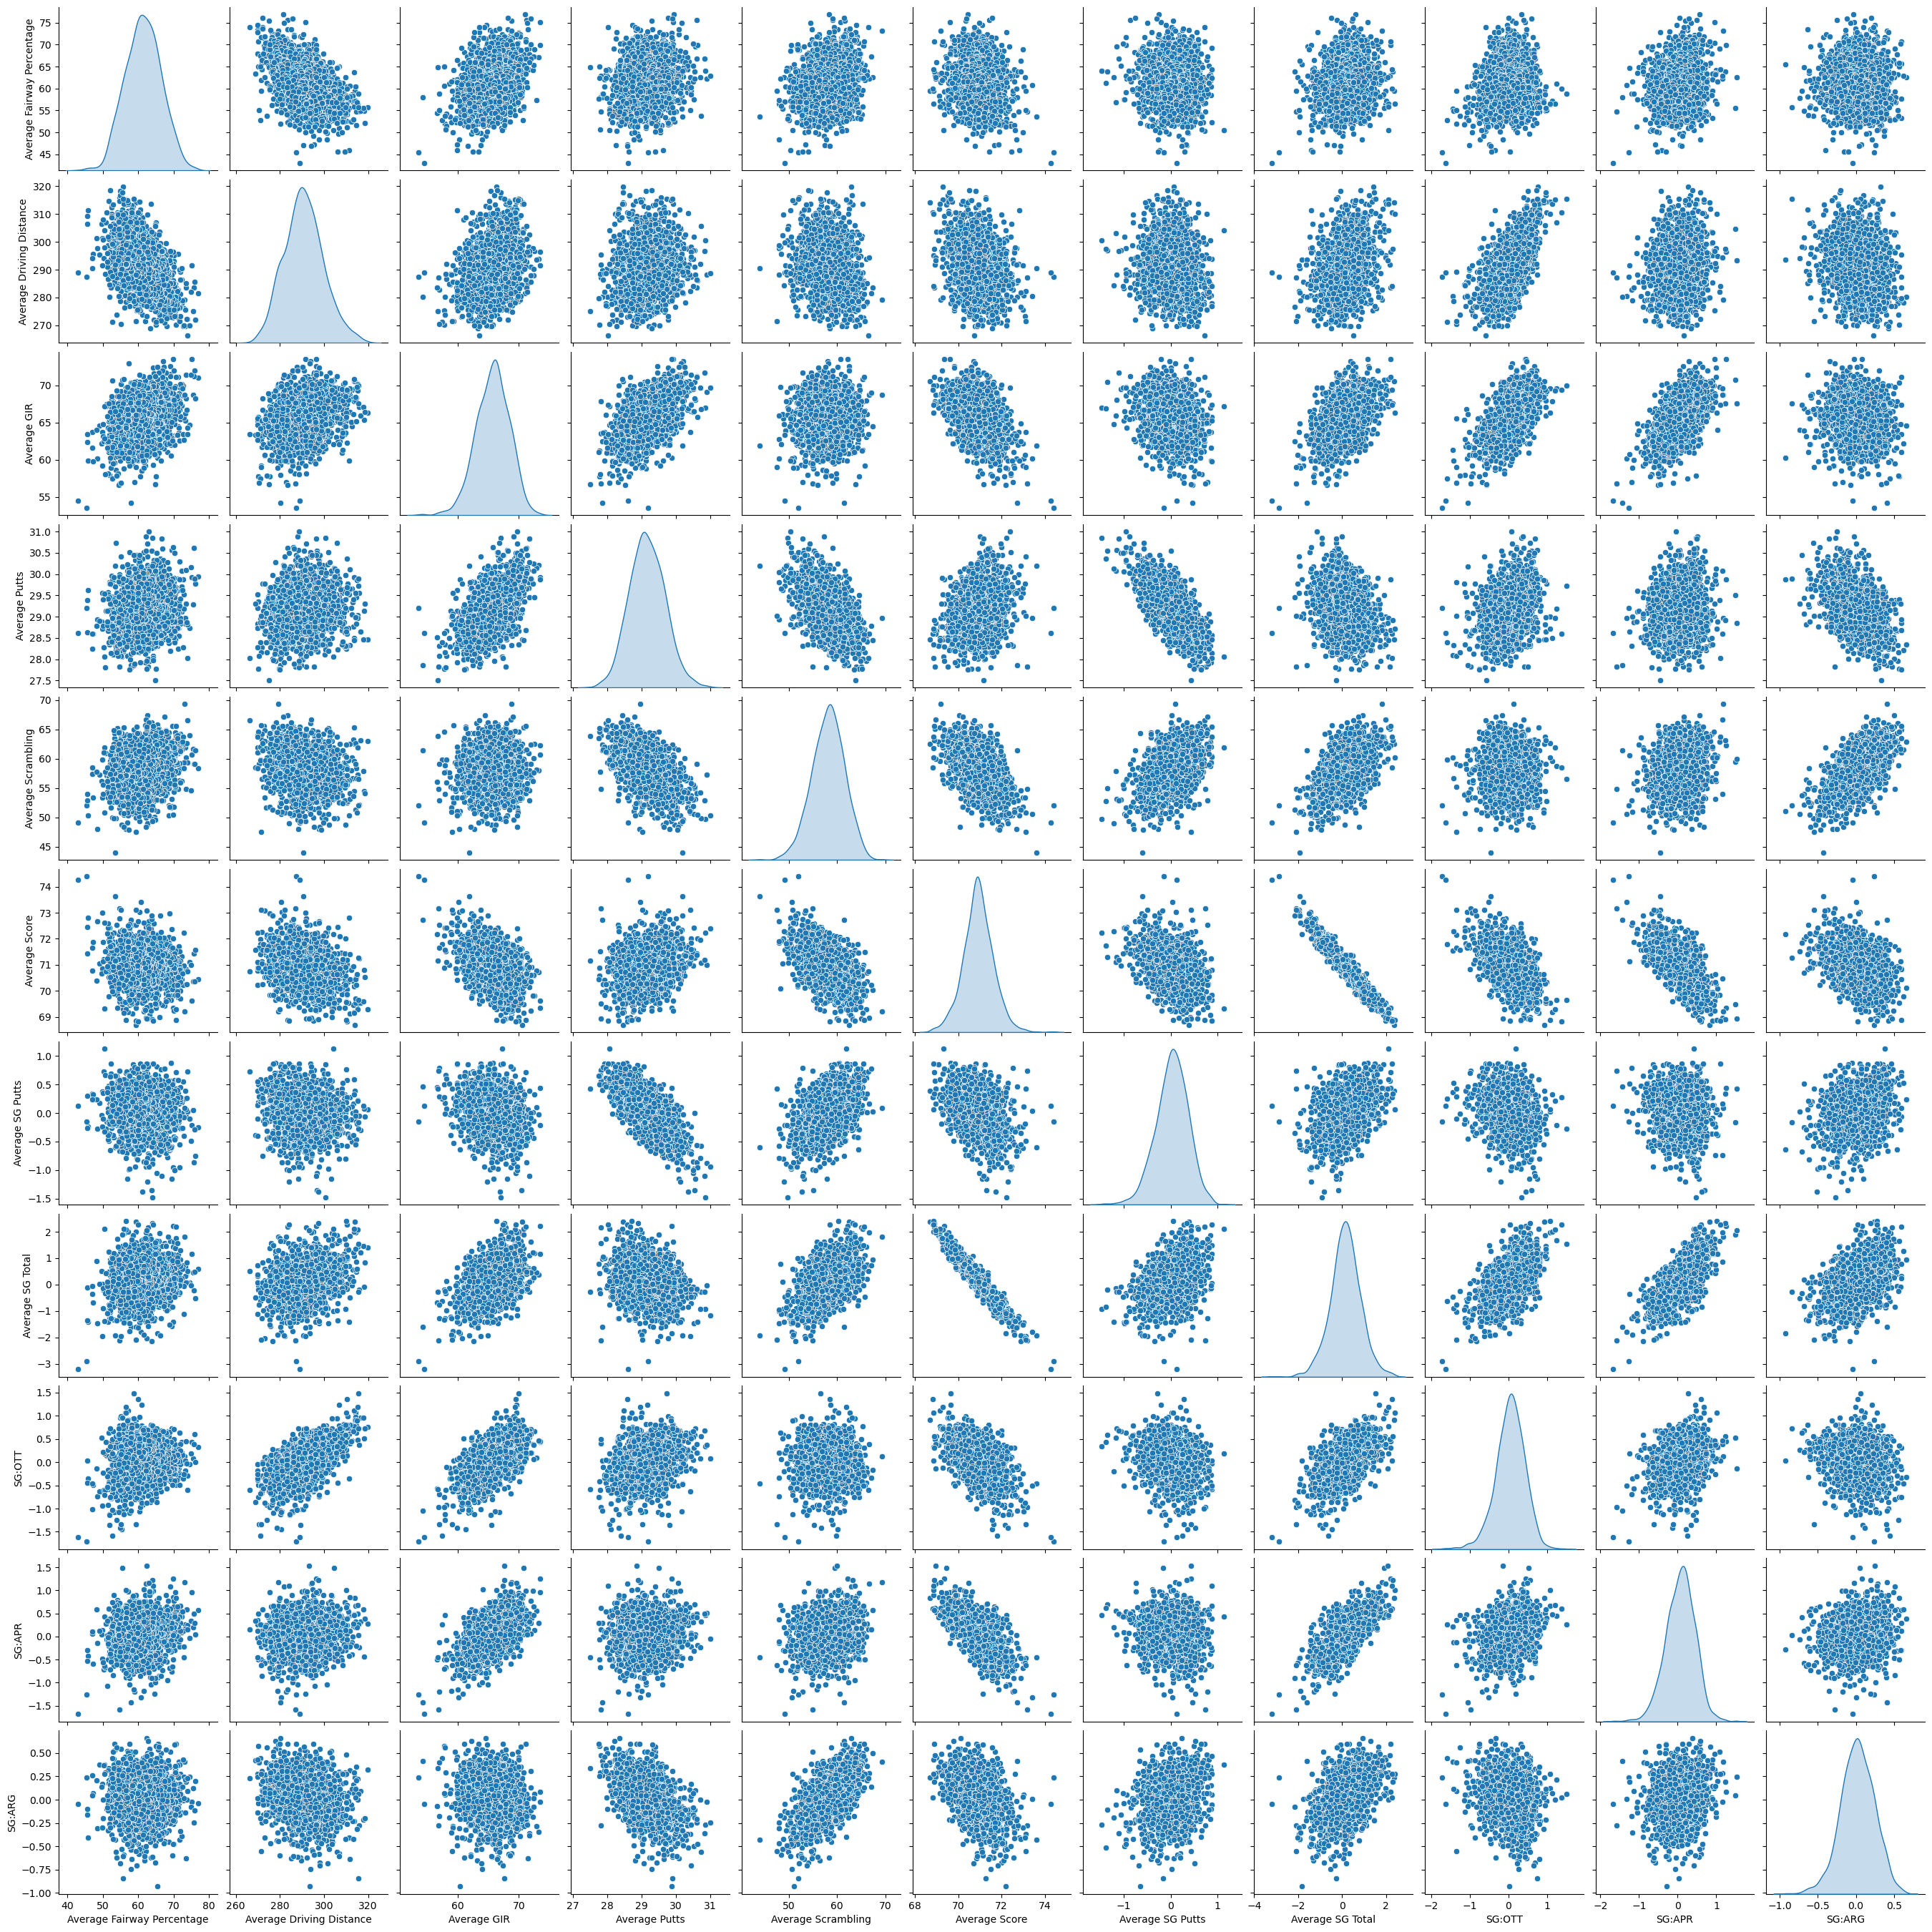

In [39]:
#Pairplot graphs to see correlation between features listed below.
sns.pairplot(df[['Average Fairway Percentage','Average Driving Distance','Average GIR','Average Putts','Average Scrambling','Average Score','Average SG Putts','Average SG Total','SG:OTT','SG:APR','SG:ARG']], diag_kind='kde')
#Good to understand how my chosen features are connected and contribute to success stats.
#Further analysis in full research paper.
#Its also worth noting that pairplots take a while to run. (around 40 seconds)

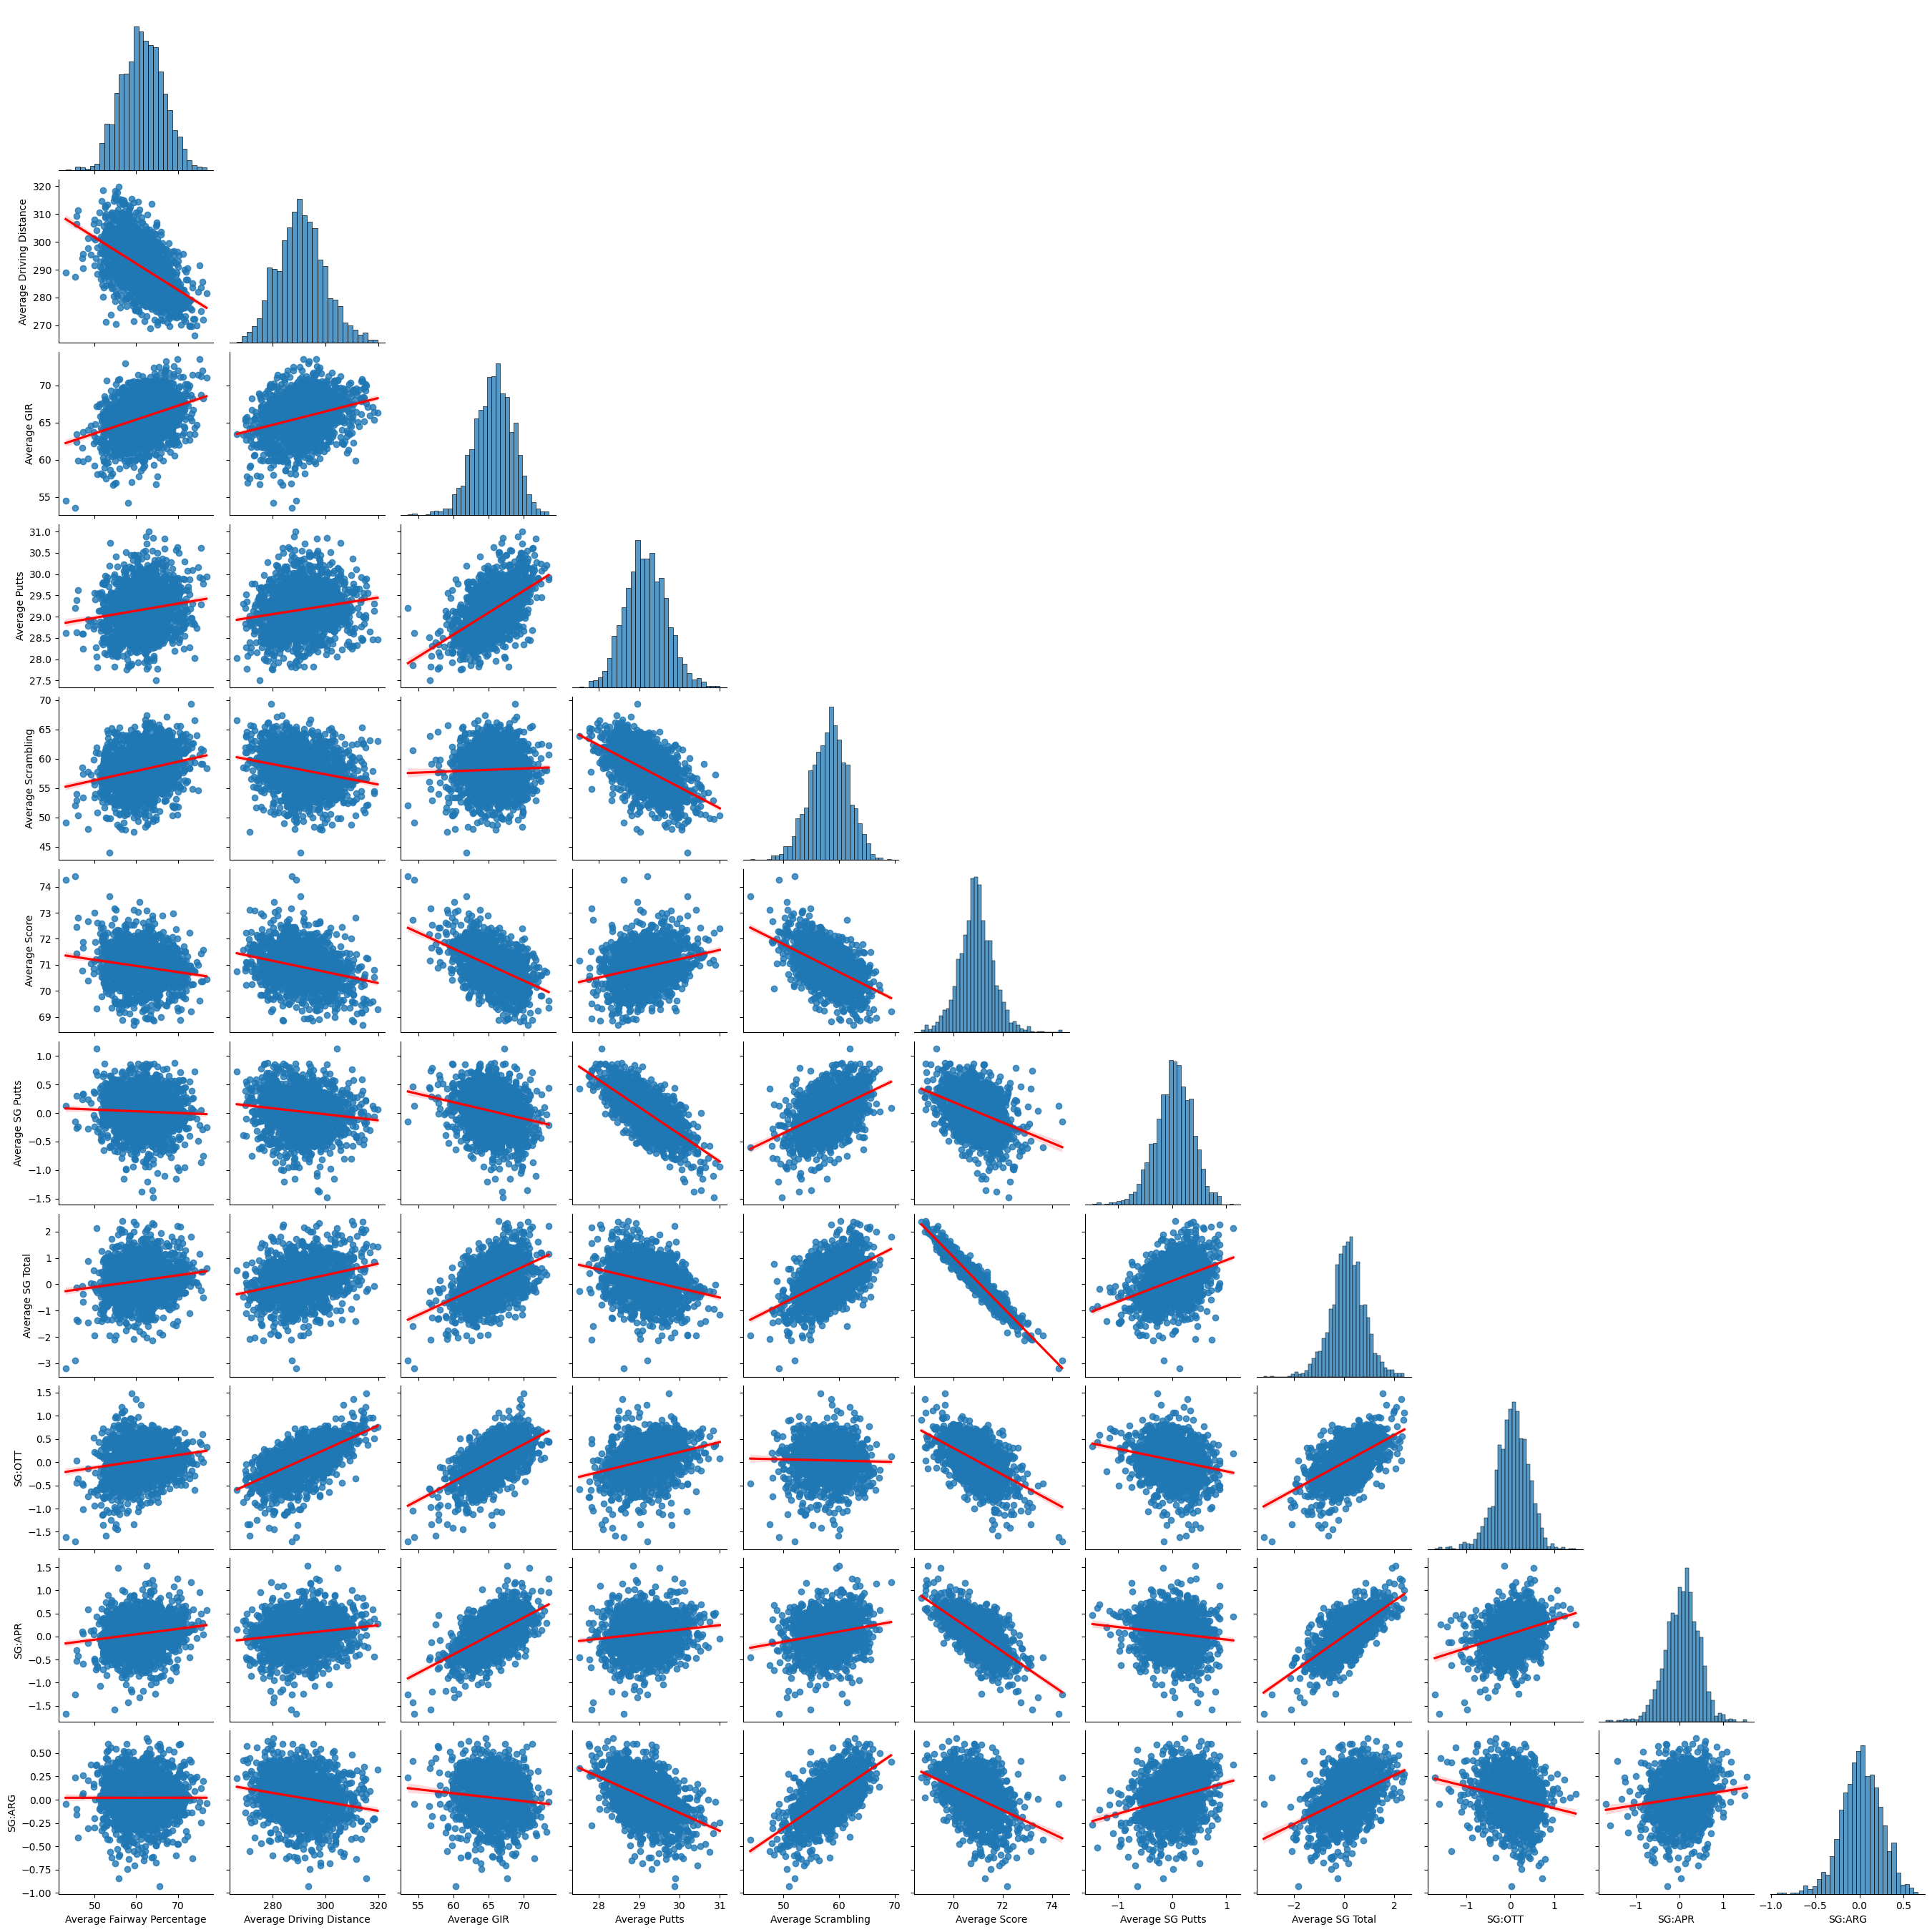

In [40]:
#Decided it was worth recreating without the excess tables and having regression lines to see positive and negative correlations.
sns.pairplot(df[['Average Fairway Percentage','Average Driving Distance','Average GIR','Average Putts','Average Scrambling','Average Score','Average SG Putts','Average SG Total','SG:OTT','SG:APR','SG:ARG']],kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})
#Further analysis in full research paper.
#Its also worth noting that pairplots take a while to run. (around 40 seconds).
#Some code was utilised from (Harvpan, 2018) when it came to changing colours and layout of pairplot.

In [41]:
#Splitting my data fractionally between testing and training data.
#I went for a 60/40 fata split. Subject to change.
train_dataset = df.sample(frac=0.6, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [42]:
#Separating all feature columns and target label columns.
train_features = train_dataset.copy()
test_features = test_dataset.copy()
#test and train data and test and train labels.
#labels will be number of top 10 Placements as this is a good measure of golfer success.
train_labels = train_features.pop('Top 10 Placements')
test_labels = test_features.pop('Top 10 Placements')
#Further elaboration as to why top 10 Placements is a good metric and why I believe its better than wins in Full Research Paper.
#split code was helped using code written by (Basic regression | TensorFlow Core, 2023).

In [43]:
#Checking if features are correct .
test_features

Year  Rounds Played in Year  Average Fairway Percentage  \
0     2018                     60                       75.19   
3     2018                     78                       71.94   
6     2018                     93                       71.29   
7     2018                     94                       70.16   
11    2018                     94                       69.11   
...    ...                    ...                         ...   
1658  2010                     88                       56.03   
1662  2010                     89                       55.44   
1671  2010                     79                       53.49   
1672  2010                     70                       52.80   
1675  2010                     82                       51.29   

      Average Driving Distance  Average GIR  Average Putts  \
0                        291.5        73.51          29.93   
3                        289.2        68.80          29.17   
6                        295.7        71.09          29.89   
7                        295.2        68.84          29.04   
11                       295.1        71.56          29.67   
...                        ...          ...            ...   
1658                     296.8        67.74          29.11   
1662                     297.3        66.86          29.04   
1671                     291.7        66.51          29.36   
1672                     287.6        61.72          28.97   
1675                     292.9        65.88          29.14   

      Average Scrambling  Average Score  Average SG Putts  Average SG Total  \
0                  60.67         69.617            -0.207             1.153   
3                  64.16         70.015            -0.271             0.941   
6                  54.80         70.404             0.037             0.686   
7                  61.05         70.152             0.546             1.133   
11                 60.93         70.436            -0.250             0.619   
...                  ...            ...               ...               ...   
1658               54.79         71.196             0.215            -0.004   
1662               56.80         70.497             0.409             0.630   
1671               58.86         71.171             0.171            -0.227   
1672               54.20         71.751             0.144            -0.520   
1675               58.46         70.953             0.252             0.093   

      SG:OTT  SG:APR  SG:ARG  
0      0.427   0.960  -0.027  
3      0.406   0.532   0.273  
6      0.378   0.298  -0.027  
7      0.364   0.345  -0.122  
11     0.439   0.415   0.014  
...      ...     ...     ...  
1658  -0.013  -0.065  -0.142  
1662   0.232   0.064  -0.074  
1671  -0.233  -0.211   0.044  
1672  -1.027   0.228   0.130  
1675  -0.538   0.336   0.047  

[671 rows x 13 columns]

In [44]:
#Checking on thecolumns in the training data set.
train_dataset.columns

Index(['Year', 'Rounds Played in Year', 'Average Fairway Percentage',
       'Average Driving Distance', 'Average GIR', 'Average Putts',
       'Average Scrambling', 'Average Score', 'Average SG Putts',
       'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG', 'Top 10 Placements'],
      dtype='object')

In [45]:
#This should be a list of all player number of top 10 placements (the stat being used for our predictive modelling).
train_labels

1013    2
1110    0
475     2
1319    4
271     2
       ..
1575    0
1185    2
1457    1
382     0
1423    2
Name: Top 10 Placements, Length: 1007, dtype: int32

In [46]:
#Some more data checks to make sure test and train sets are correct.
train_dataset.describe().transpose()

count         mean        std       min  \
Year                        1007.0  2014.010924   2.611886  2010.000   
Rounds Played in Year       1007.0    78.872890  14.371171    45.000   
Average Fairway Percentage  1007.0    61.336634   5.141426    43.020   
Average Driving Distance    1007.0   291.011718   9.097686   268.900   
Average GIR                 1007.0    65.650149   2.750847    53.540   
Average Putts               1007.0    29.172324   0.522625    27.510   
Average Scrambling          1007.0    58.071072   3.383710    44.010   
Average Score               1007.0    70.937447   0.715134    68.698   
Average SG Putts            1007.0     0.020973   0.346637    -1.475   
Average SG Total            1007.0     0.141721   0.706060    -3.209   
SG:OTT                      1007.0     0.042942   0.382708    -1.717   
SG:APR                      1007.0     0.058404   0.385300    -1.680   
SG:ARG                      1007.0     0.019934   0.219986    -0.845   
Top 10 Placements           1007.0     2.327706   2.094644     0.000   

                                  25%       50%        75%       max  
Year                        2012.0000  2014.000  2016.0000  2018.000  
Rounds Played in Year         68.5000    80.000    89.0000   116.000  
Average Fairway Percentage    57.7050    61.490    64.9050    76.880  
Average Driving Distance     285.0000   290.700   296.7000   319.700  
Average GIR                   63.8200    65.810    67.6100    73.520  
Average Putts                 28.8100    29.150    29.5200    31.000  
Average Scrambling            55.8350    58.270    60.4700    67.160  
Average Score                 70.4840    70.920    71.3680    74.400  
Average SG Putts              -0.1865     0.043     0.2565     1.130  
Average SG Total              -0.2650     0.149     0.5805     2.406  
SG:OTT                        -0.1655     0.059     0.2890     1.367  
SG:APR                        -0.1885     0.077     0.3090     1.533  
SG:ARG                        -0.1260     0.026     0.1695     0.660  
Top 10 Placements              1.0000     2.000     3.0000    12.000

In [47]:
#Chekcing typings as Tensors are very restrictive on varibale typings.
train_features.dtypes

Year                            int64
Rounds Played in Year           int32
Average Fairway Percentage    float64
Average Driving Distance      float64
Average GIR                   float64
Average Putts                 float64
Average Scrambling            float64
Average Score                 float64
Average SG Putts              float64
Average SG Total              float64
SG:OTT                        float64
SG:APR                        float64
SG:ARG                        float64
dtype: object

In [48]:
#Creating data type cohesion, making everything a float64.
train_features['Year'] = train_features['Year'].astype('float64')
train_features['Rounds Played in Year'] = train_features['Rounds Played in Year'].astype('float64')


In [49]:
np.array(train_features, dtype = 'float64')

array([[ 2.013e+03,  6.500e+01,  6.162e+01, ...,  5.410e-01,  3.070e-01,
        -8.300e-02],
       [ 2.012e+03,  9.300e+01,  7.169e+01, ...,  2.480e-01,  4.270e-01,
        -1.580e-01],
       [ 2.016e+03,  8.500e+01,  6.032e+01, ...,  8.000e-03, -3.940e-01,
         1.200e-02],
       ...,
       [ 2.011e+03,  7.500e+01,  5.662e+01, ..., -2.710e-01, -2.360e-01,
         3.400e-02],
       [ 2.017e+03,  5.900e+01,  4.537e+01, ..., -1.717e+00, -1.260e+00,
         2.380e-01],
       [ 2.011e+03,  9.800e+01,  5.952e+01, ...,  5.160e-01,  5.150e-01,
         1.390e-01]])

In [50]:
#Using a TensorFlow/Keras function to normalize continuous data.
normalizer = tf.keras.layers.Normalization(axis=-1)

In [51]:
#Apllying the normalizer to the training data.
normalizer.adapt(train_features)

In [52]:
#Construction of first deep neural network model using Adam optimizer and a learning rate of 0.1.
#arbrtrary recommend values chosen for first model creation, will be optimised later.
def build_and_compile_model1(norm):
  model1 = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
#Calculate Absolute mean square error and Accuracy as evaluative metrics for model.
  model1.compile(loss='mean_absolute_error',metrics = 'accuracy',
                optimizer=tf.keras.optimizers.Adam(0.1))
  return model1
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023), helpful whenm learning setup and basic optimization.

In [53]:
#Building and compiling model.
dnn_model1 = build_and_compile_model1(normalizer)
#Model summary.
dnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


In [54]:
%%time
#The code %%time prints the wall time for this chunk of code.

#The model is being devbeloped to see how well it fits to simmilar data.

history = dnn_model1.fit(
    train_features,
    train_labels,
#The following parameters are standard ones chosen for initial results (unoptimised).
    validation_split=0.2,
#The 100 epochs refers to the 100 iterations of the complete training data set run through.
#Batch size refers to the number of samples processed before the model is updated.
    verbose=0, epochs=100, batch_size=200)

CPU times: total: 35.2 s
Wall time: 4.12 s


In [55]:
#A graphical line plot has been created using the history above to gague the Absolute Root Mean Square Error as more epochs are iterated through.
def plot_loss(history):
#Plotting the losses and val_losses.
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
#Graph parameters for visuals
  plt.xlim([0, 100])
  plt.ylim([0, 2])
  plt.xlabel('Epoch')
  plt.ylabel('ARMS Error [Top 10 Placements]')
  plt.legend()
  plt.grid(True)
#Analysis of graph will be conducted in full reserach Paper.
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023).

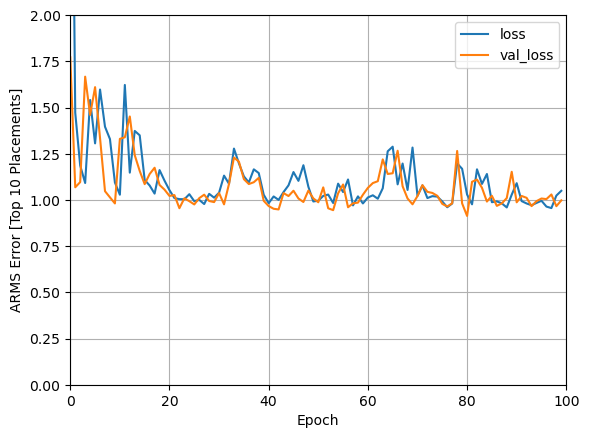

In [56]:
plot_loss(history)

In [57]:
#New plot to show how model accuracy chnages with more iterations of the training data being run through.
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.ylim([0.2, 0.3])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
#Analysis of graph will be conducted in full reserach Paper.
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023).

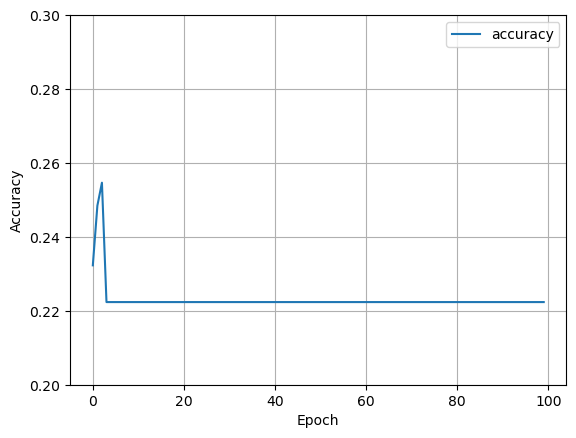

In [58]:
plot_accuracy(history)

21/21 [==============================] - 0s 1ms/step


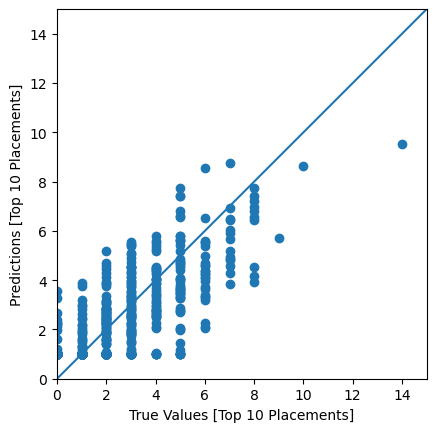

In [59]:
#New regression plot to show how models precited values vary from the true values of player top 10 placements.
test_predictions = dnn_model1.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
#True value versus predicted values.
plt.xlabel('True Values [Top 10 Placements]')
plt.ylabel('Predictions [Top 10 Placements]')
#Highest number of top 10 placemnets in the test data is 14.
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
#Analysis of graph in Research Paper.
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023).

In [60]:
# Set up the hyperparameter grid for hyper parameter optimization using a grid search technique.
param_grid = {
#Decided to iterate through the following parameters using a dictionary array system.
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [100, 200],
    'epochs': [50, 100],
    'optimizer': ['Adam','rmsprop'],
    'hidden_layer_size':[64]
}
#I will explain my parameter choices in the research paper.
#Important to note that these parameters were limited to keep run-time low as iterating through 1000's of different potential models is time-consuming and taxing on my hardware.

In [61]:
#Rebuilding a model for the hyper parameter tuning
#Could be made more effiecient but this allows me to easily see when each of my models is being made
#A big difference in this model is that it wil be taking its parameters from the param_grid made above and iterating through them.
def build_and_compile_model2(learning_rate, batch_size, epochs, optimizer,hidden_layer_size ):
    model2 = keras.Sequential([
        layers.Dense(hidden_layer_size, activation='relu'),
        layers.Dense(hidden_layer_size, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.get(optimizer)
    optimizer.learning_rate= learning_rate
    model2.compile(loss='mean_absolute_error', metrics='accuracy', optimizer=optimizer)

    return model2
#This model simmilar to the initally built one was built with the aid of (Basic regression | TensorFlow Core, 2023).

In [62]:
#This is where the Grid Search takes place.
grid_search = GridSearchCV(
    keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_and_compile_model2),
    param_grid=param_grid,
    cv=2,
    verbose=0
)

#Fit the grid search to the training data
grid_search.fit(train_features, train_labels, validation_data=(test_features, test_labels))

# Print the best hyperparameters and the corresponding mean validation score to get an idea of the best parameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean validation score: ", grid_search.best_score_)
#The parameter settings that provide the best overall results will be used to construct the final models.
#It is worth noting that due to hardware capabilities I have had to limit the amount of epochs and diffferent paramters I iterate through as this process takes a great deal of time
#I do not recommend running this code as it can take by processor over 30 minutes to complete all the iterations of potentail models.
#Or if you do decide to run this code. Pause it after you are satisfied with its output.

#The usage of a grid search method was researchd by me and helped with the tutorials provided in (Stewart PhD, 2023).
#More code after results set produced from grid search below.

C:\Users\AdamK\AppData\Local\Temp\ipykernel_10980\3982982190.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_and_compile_model2),


Epoch 1/50
6/6 [==============================] - 1s 45ms/step - loss: 70.1423 - accuracy: 0.2127 - val_loss: 72.8773 - val_accuracy: 0.2176
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 36.6170 - accuracy: 0.2306 - val_loss: 31.3746 - val_accuracy: 0.1833
Epoch 3/50
6/6 [==============================] - 0s 7ms/step - loss: 19.7162 - accuracy: 0.2306 - val_loss: 22.7884 - val_accuracy: 0.2176
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 13.3111 - accuracy: 0.2187 - val_loss: 2.8829 - val_accuracy: 0.2385
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 6.4780 - accuracy: 0.2386 - val_loss: 5.0555 - val_accuracy: 0.1997
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 4.7796 - accuracy: 0.2664 - val_loss: 2.7963 - val_accuracy: 0.2429
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 3.4860 - accuracy: 0.2644 - val_loss: 4.5015 - val_accuracy: 0.2101
Epoch 8/50
6/6 [==========

New set of hyper parameters now have optimal settings to give the best model based on the grid search above.
The settings are as follows and will be used to build a new model:
Batch size: 100
Epochs: 100
Hidden Layer size: 64
Learning Rate: 0.01
Optimizer: Adam

It is also worth noting that these can be improved upon with more time, potentailly more tested out variants of parameters and more parameters.

In [63]:
#Now that my grid search is finished running it has given me the optimal parameter tuning to give the best results
#I will now create a new final model using these refined settings and see how my evaluative metrics hopefully improve.
def build_and_compile_model3(norm):
  model3 = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model3.compile(loss='mean_absolute_error',metrics = 'accuracy',
                optimizer=tf.keras.optimizers.Adam(learning_rate= 0.01)
                )
#Using new learning rate        
  return model3
#This model simmilar to the initally built one was built with the aid of (Basic regression | TensorFlow Core, 2023).

In [64]:
#Building and compiling model.
dnn_model3 = build_and_compile_model3(normalizer)
#Model summary.
dnn_model3.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense_150 (Dense)           (None, 64)                896       
                                                                 
 dense_151 (Dense)           (None, 64)                4160      
                                                                 
 dense_152 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_________________________________________________________________


In [65]:
%%time
#The model is being devbeloped to see how well it fits to simmilar data.
#This code will be almost identical to the previously used code above from older models with some of our hyper parameters being changed.
history2 = dnn_model3.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100, batch_size=100)
            

CPU times: total: 39.9 s
Wall time: 4.53 s


In [66]:
#A graphical line plot has been created using the history above to gague the Absolute Root Mean Square Error as more epochs are iterated through.
def plot_loss2(history2):
  plt.plot(history2.history['loss'], label='loss')
  plt.plot(history2.history['val_loss'], label='val_loss')
  plt.ylim([0, 2])
  plt.xlim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('ARMS Error [Top 10 Placements]')
  plt.legend()
  plt.grid(True)
#Analysis of graph will be conducted in full reserach Paper.
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023).

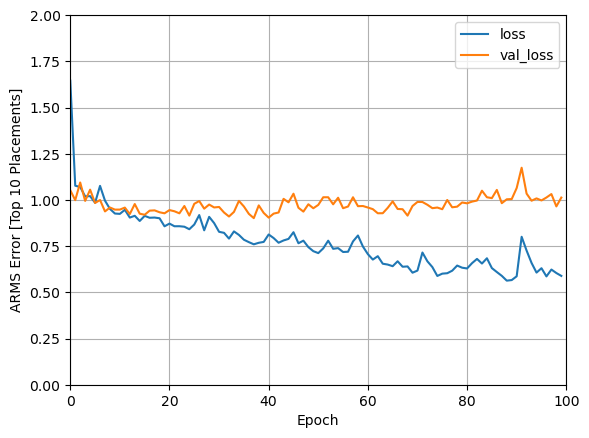

In [67]:
plot_loss2(history2)

In [68]:
#Graphical plot has been created to see how my models accuracy will change through each iteration of the training data. (epochs)
def plot_accuracy2(history2):
  plt.plot(history2.history['accuracy'], label='accuracy')
  plt.ylim([0.2, 0.4])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
#Analysis of graph will be conducted in full reserach Paper.
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023).

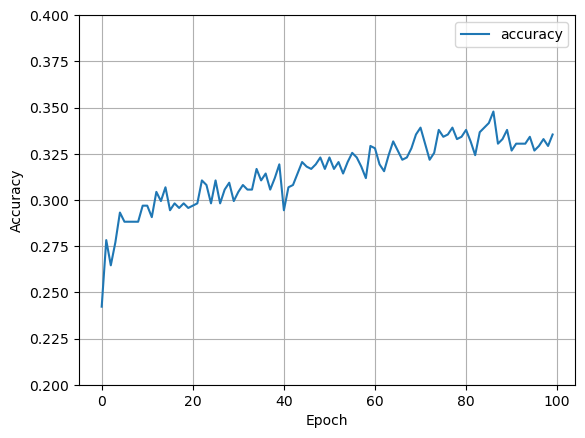

In [69]:
plot_accuracy2(history2)

21/21 [==============================] - 0s 951us/step


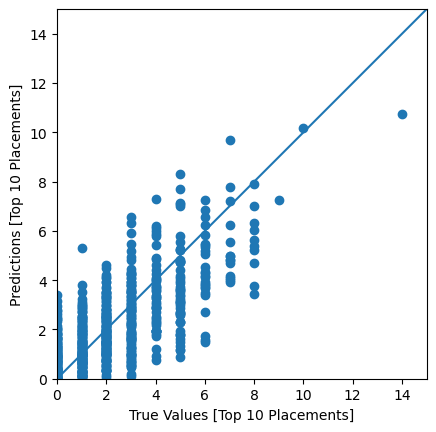

In [70]:
#Predictions are being plotted against the actual values to see how well my model is performing.
test_predictions2 = dnn_model3.predict(test_features).flatten()

b = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Values [Top 10 Placements]')
plt.ylabel('Predictions [Top 10 Placements]')
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
#Analysis of graph will be conducted in full reserach Paper.
#Code has been used and changed from (Basic regression | TensorFlow Core, 2023).

In [76]:
#Made an array of values for a made up player with average PGA Tour Pro statistics just to see whether my model can give me a reasonable prediction.
Prediction_data = np.array([[2020, 80, 65, 315, 62, 30, 55, 72, 0.2, 0.41,-0.1,0.1,0.4]])
#Make predictions on the new data using the trained model
predictions = dnn_model3.predict(Prediction_data)
#Print the predicted values for the number of times a player is predicted to place in the top 10 for tournaments across the year.
print(predictions)

1/1 [==============================] - 0s 19ms/step
[[1.4040424]]


In [77]:
#I thought it might be interesting to expermient with the model to see how it would interprate newer data from the current world No.1 player Jon Rahm in his previous season.
#Bearing in mind the actual number of top 10 Placements he had in 2022 was 8.
Prediction_dataJonRahm = np.array([[2022, 70, 65, 321, 72, 29, 57, 69.7, 0.367, 1.66,1.025,0.363,-0.8]])
predictionsJonRahm = dnn_model3.predict(Prediction_dataJonRahm)
print(predictionsJonRahm)
#This result seems to be underestimating the performance, further analysis of this will be studied in full research paper.

1/1 [==============================] - 0s 17ms/step
[[3.9107678]]
